In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as ss
import scipy

In [2]:
def mog_sample(pi, mu, std, N=1000000):
    assert np.sum(pi) == 1
    assert mu.shape == std.shape == pi.shape
    
    comp = np.random.choice(len(pi), p=pi, size=N)
    return (np.random.randn(N)*std[comp] + mu[comp])[:, None]

def mog_logprob(x, pi, mu, std):
    assert np.sum(pi) == 1
    assert mu.shape == std.shape == pi.shape
    
    return scipy.special.logsumexp(np.log(pi) + ss.norm.logpdf(x, mu, std), axis=-1)

def mog_kl(pi1, mu1, std1, pi2, mu2, std2, N=1000000):
    x = mog_sample(pi1, mu1, std1, N=N)
    
    logprob1 = mog_logprob(x, pi1, mu1, std1)
    logprob2 = mog_logprob(x, pi2, mu2, std2)
    
    return np.mean(logprob1 - logprob2)

def mog_skl(pi1, mu1, std1, pi2, mu2, std2, N=1000000):
    kl1 = mog_kl(pi1, mu1, std1, pi2, mu2, std2, N=N)
    kl2 = mog_kl(pi2, mu2, std2, pi1, mu1, std1, N=N)
    
    return (kl1 + kl2)/2

def plot_mog(pi, mu, std):
    x = np.linspace(-3, 3)[:, None]
    y = np.exp(mog_logprob(x, pi, mu, std))
    plt.plot(x, y)

In [58]:
pi1 = np.array([0.5, 0.5])
mu1 = np.array([-1, 1])
std1 = np.array([0.5, 0.5])

pi2 = np.array([1])
mu2 = np.array([0])
std2 = np.array([0.5])

KL: 1.369182594349659
SKL: 1.1566008558312828


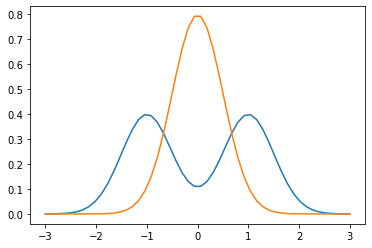

In [59]:
plot_mog(pi1, mu1, std1)
plot_mog(pi2, mu2, std2)
print('KL:', mog_kl(pi1, mu1, std1, pi2, mu2, std2))
print('SKL:', mog_skl(pi1, mu1, std1, pi2, mu2, std2))

In [60]:
pi2 = np.array([1])
mu2 = np.array([-1])
std2 = np.array([0.5])

KL: 3.367640420798592
SKL: 2.00210801753763


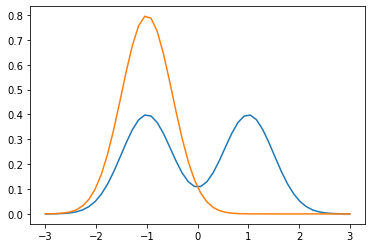

In [61]:
plot_mog(pi1, mu1, std1)
plot_mog(pi2, mu2, std2)
print('KL:', mog_kl(pi1, mu1, std1, pi2, mu2, std2))
print('SKL:', mog_skl(pi1, mu1, std1, pi2, mu2, std2))

In [62]:
pi2 = np.array([0.9, 0.1])
mu2 = np.array([-1, 1])
std2 = np.array([0.5, 0.3])

KL: 0.5510131978968488
SKL: 0.4465760731248908


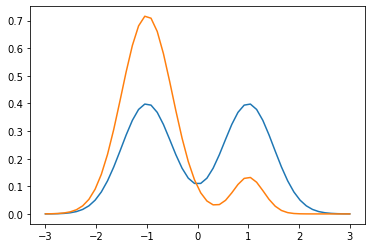

In [63]:
plot_mog(pi1, mu1, std1)
plot_mog(pi2, mu2, std2)
print('KL:', mog_kl(pi1, mu1, std1, pi2, mu2, std2))
print('SKL:', mog_skl(pi1, mu1, std1, pi2, mu2, std2))

In [64]:
pi2 = np.array([0.5, 0.5])
mu2 = np.array([-1, 1])
std2 = np.array([0.5, 0.3])

KL: 0.1327937260188383
SKL: 0.10619396141660917


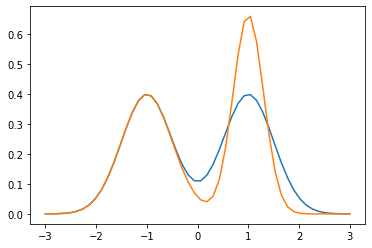

In [65]:
plot_mog(pi1, mu1, std1)
plot_mog(pi2, mu2, std2)
print('KL:', mog_kl(pi1, mu1, std1, pi2, mu2, std2))
print('SKL:', mog_skl(pi1, mu1, std1, pi2, mu2, std2))

In [66]:
pi2 = np.array([0.5, 0.5])
mu2 = np.array([-1, 1.1])
std2 = np.array([0.5, 0.5])

KL: 0.008626052609598988
SKL: 0.008683094867235494


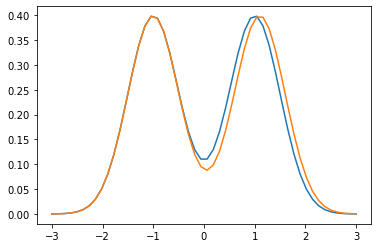

In [69]:
plot_mog(pi1, mu1, std1)
plot_mog(pi2, mu2, std2)
print('KL:', mog_kl(pi1, mu1, std1, pi2, mu2, std2))
print('SKL:', mog_skl(pi1, mu1, std1, pi2, mu2, std2))

In [70]:
pi2 = np.array([0.5, 0.5])
mu2 = np.array([-1, 1])
std2 = np.array([0.5, 0.5])

KL: 0.0
SKL: 0.0


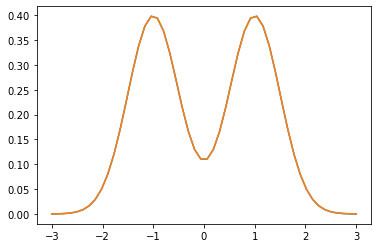

In [71]:
plot_mog(pi1, mu1, std1)
plot_mog(pi2, mu2, std2)
print('KL:', mog_kl(pi1, mu1, std1, pi2, mu2, std2))
print('SKL:', mog_skl(pi1, mu1, std1, pi2, mu2, std2))

In [11]:
pi1 = np.array([1])
mu1 = np.array([-1])
std1 = np.array([0.5])

pi2 = np.array([1])
mu2 = np.array([1])
std2 = np.array([0.5])

Euclidean between means:  2.0
KL: 7.995708078537982


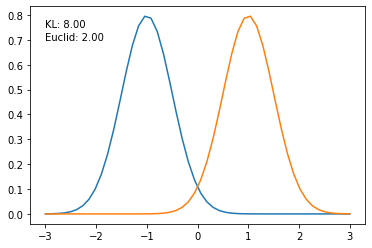

In [26]:
plot_mog(pi1, mu1, std1)
plot_mog(pi2, mu2, std2)
kl = mog_kl(pi1, mu1, std1, pi2, mu2, std2)
euc = (((mu1 - mu2)**2)**(1/2)).item()
plt.text(-3, 0.75, f'KL: {kl:.2f}', ha='left')
plt.text(-3, 0.70, f'Euclid: {euc:.2f}', ha='left')
print('Euclidean between means: ', euc)
print('KL:', kl)

In [27]:
pi1 = np.array([1])
mu1 = np.array([-1])
std1 = np.array([1])

pi2 = np.array([1])
mu2 = np.array([1])
std2 = np.array([1])

Euclidean between means:  2.0
KL: 2.00307145520746


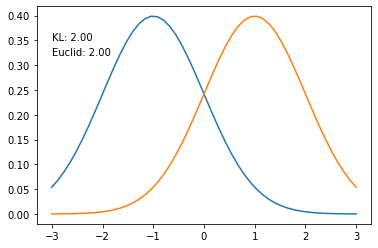

In [31]:
plot_mog(pi1, mu1, std1)
plot_mog(pi2, mu2, std2)
kl = mog_kl(pi1, mu1, std1, pi2, mu2, std2)
euc = (((mu1 - mu2)**2)**(1/2)).item()
plt.text(-3, 0.35, f'KL: {kl:.2f}', ha='left')
plt.text(-3, 0.32, f'Euclid: {euc:.2f}', ha='left')
print('Euclidean between means: ', euc)
print('KL:', kl)